## IEESP - – Luxury Watch 
Sean Kelly X00221555
| David Burgos X00229142
| Daniel Alonso X00226363

## 1. Dataset Acquisition 

The dataset in which we have chosen is a luxury watch pricing dataset. The criteria in which this dataset contains includes brands, models, prices, cases, straps, movements, water resistance, case diameter, case thickness, band width, dial color, crystal material, complications and power reserves. 

The dataset has 14 columns and 508 rows. It is a publicly available dataset available on Kaggle. https://www.kaggle.com/datasets/rkiattisak/luxury-watches-price-dataset/data

This dataset is useful for Businesses, Resellers, enthusiasts and individuals wishing to further expand their knowledge in the expertise

## Objective

The Objective of this project is to **evaluate and provide statistics on the pricing of these watches compared to the prestige of their branding and the condition they are in**. We believe that these categories are important to compare as branding significantly influences the perceived value and resale potential of a luxury watch, aswell as the condition greatly affecting the collectability aswell as longevity of the singular watch itself.

Our Solution can be used to understand the pricing compared to the watch quality generally. Another way to do this would be to visit an actual jewellery shop although this could involve bias based on the products they have available.

## AI System

We plan to demo the AI user system by asking the user to input **Brand, User Lifestyle and Price**. With the information given, the system will take the information from the dataset and inform the user whether the watch seems like a good option for the price quoted **compared to the user's lifestyle, aswell as how reliable the watch should be**. 

Necessary imports:

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import joblib
from pathlib import Path

## Data Loading

In [43]:
def load_watch_data():
    url = "https://raw.githubusercontent.com/SDKELLY06/IEESP/refs/heads/main/Luxury%20watch.csv"
    csv_path = Path("Luxury watch.csv")

    if not csv_path.exists():
        filename = pd.read_csv(url)
        filename.to_csv(csv_path, index=False)
    else:
        filename = pd.read_csv(csv_path)

    return filename

watches = load_watch_data()

print("\n")
filename = "Luxury watch.csv"
data = np.genfromtxt(filename, delimiter=',')
print("Data shape:", data.shape)
watches.head()

ValueError: Some errors were detected !
    Line #26 (got 15 columns instead of 14)

In [ ]:
watches.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,9500.0
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,5800.0
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,4200.0
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,7900.0
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,2800.0


In [ ]:
watches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        385 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    float64
dtypes: float64(4), object(10)
memory usage: 55.6+ KB


In [ ]:
watches["Price (USD)"].value_counts()

Price (USD)
7500.0     26
6500.0     22
9500.0     16
4500.0     12
5500.0     11
           ..
9900.0      1
7650.0      1
67000.0     1
27900.0     1
35000.0     1
Name: count, Length: 182, dtype: int64

In [ ]:
watches.describe()

,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Price (USD)
count,507.000000,507.000000,507.000000,506.000000
mean,41.046154,11.588343,21.105523,12082.964427
std,2.535339,2.491481,1.658375,10419.816968
min,27.500000,5.000000,15.000000,495.000000
25%,40.000000,9.800000,20.000000,5500.000000
50%,41.000000,12.000000,20.000000,8350.000000
75%,42.000000,13.300000,22.000000,16450.000000
max,46.500000,17.500000,28.000000,70000.000000


## Dataset Cleaning and Wrangling
1. Creating Test Set 
3. Displays rows with missing values
4. Creating copy of dataset
5. Fixing missing values in dataset
6. New column / displaying new column


In [ ]:
def shuffle_and_split_data(data, test_ratio):
   np.random.seed(42)
   shuffled_indices = np.random.permutation(len(data))
   test_set_size = int(len(data) * test_ratio)
   test_indices = shuffled_indices[:test_set_size]
   train_indices = shuffled_indices[test_set_size:]
   return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(watches, 0.2)
len(train_set)

len(test_set)


test = shuffle_and_split_data
print(test)
print("\n")
train_set, test_set = train_test_split(watches, test_size=0.2, random_state=42)

print("Test set size:", len(test_set))
print("Train set size:", len(train_set))
test_set["Complications"].isnull().sum()


<function shuffle_and_split_data at 0x000002A61E213F60>


Test set size: 102
Train set size: 405


np.int64(15)

## Missing Values
Power Reserve + Complications have missing values

In [ ]:
null_rows_idx = watches.isnull().any(axis=1)
watches.loc[null_rows_idx].head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,2800.0
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30 meters,42.9,9.20,20.0,Black,Sapphire,NaN,45 hours,5500.0
9,Hamilton,Khaki Field,Stainless Steel,Leather,Automatic,100 meters,38.0,9.80,20.0,Black,Sapphire,NaN,80 hours,495.0
14,Breguet,Classique,18k White Gold,Leather,Manual,30 meters,38.0,8.65,20.0,Silver,Sapphire,NaN,40 hours,16000.0
19,Panerai,Luminor Base Logo,Stainless Steel,Leather,Manual,100 meters,44.0,10.50,22.0,Black,Sapphire,NaN,56 hours,3900.0


In [ ]:
watches_option = watches.copy() 

watches_option.dropna(subset=["Power Reserve"], inplace=True)

watches_option.loc[null_rows_idx].head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30 meters,42.9,9.20,20.0,Black,Sapphire,NaN,45 hours,5500.0
9,Hamilton,Khaki Field,Stainless Steel,Leather,Automatic,100 meters,38.0,9.80,20.0,Black,Sapphire,NaN,80 hours,495.0
14,Breguet,Classique,18k White Gold,Leather,Manual,30 meters,38.0,8.65,20.0,Silver,Sapphire,NaN,40 hours,16000.0
19,Panerai,Luminor Base Logo,Stainless Steel,Leather,Manual,100 meters,44.0,10.50,22.0,Black,Sapphire,NaN,56 hours,3900.0
20,Tudor,Black Bay,Stainless Steel,Leather,Automatic,200 meters,41.0,11.90,22.0,Black,Sapphire,NaN,70 hours,3500.0


In [ ]:


watches_option["Power Reserve"] = watches_option["Power Reserve"].fillna(0)
watches_option["Complications"] = watches_option["Complications"].fillna(0)
watches_option["Price (USD)"] = watches_option["Price (USD)"].fillna(0)

watches_option["Water Resistance"] = watches_option["Water Resistance"].str.replace("meters", "").str.strip()
watches_option["Power Reserve"] = watches_option["Power Reserve"].str.replace("days", "").str.strip()
watches_option["Power Reserve"] = watches_option["Power Reserve"].str.replace("hours", "").str.strip()
watches_option.head()


,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300,40.0,13.00,20.0,Black,Sapphire,Date,48,9500.0
1,Omega,Seamaster,Titanium,Rubber,Automatic,600,43.5,14.47,21.0,Blue,Sapphire,Date,60,5800.0
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100,41.0,13.00,20.0,White,Sapphire,Chronograph,42,4200.0
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30,43.0,14.25,22.0,Black,Sapphire,Chronograph,70,7900.0
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30,42.9,9.20,20.0,Black,Sapphire,0,45,5500.0


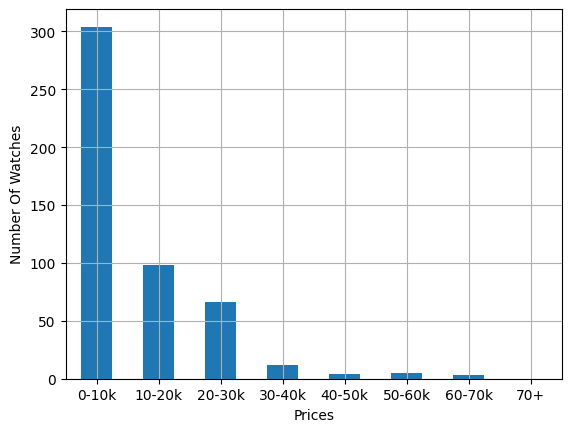

In [ ]:
watches_option["Pricing"] = pd.cut(watches_option["Price (USD)"],
                                bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000., np.inf],
                                labels=["0-10k", "10-20k", "20-30k", "30-40k", "40-50k", "50-60k", "60-70k", "70+"])

watches_option["Pricing"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Prices")
plt.ylabel("Number Of Watches")
plt.show()

## Visualising Data

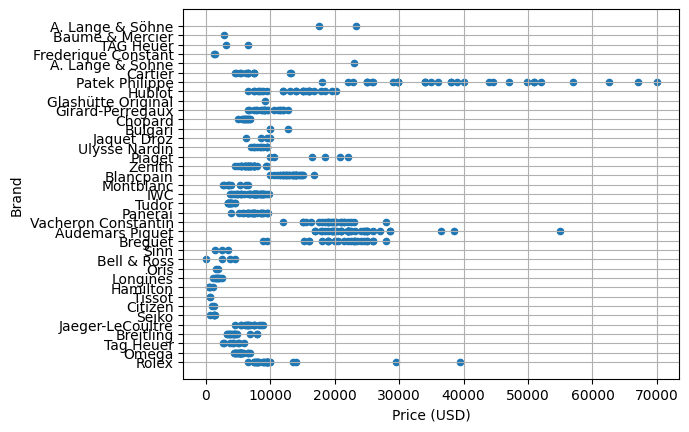

In [ ]:
watches_option.plot(kind="scatter", x="Price (USD)", y="Brand", grid=True)
plt.show()

c:\Users\david\OneDrive - Technological University Dublin\year2\Y2AI\proyecto_test\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


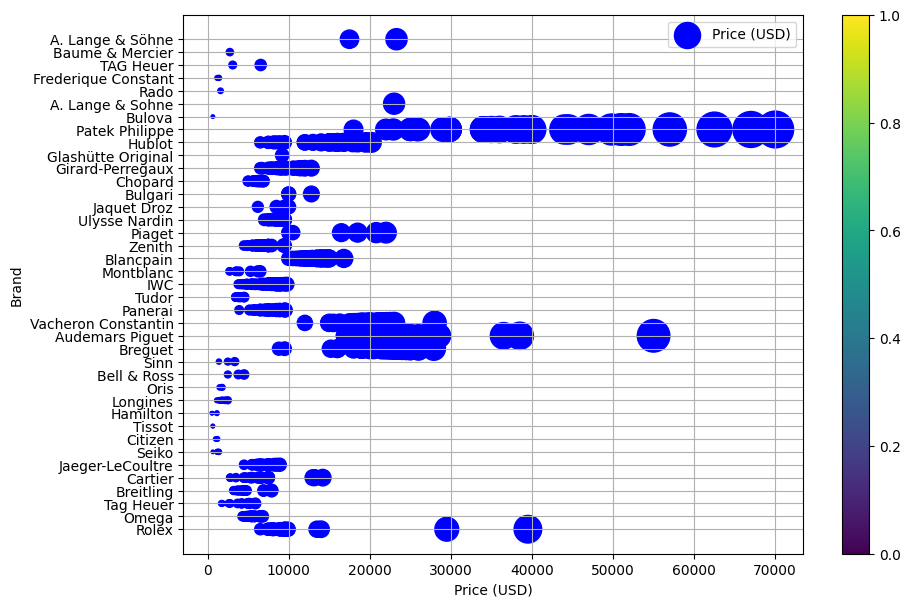

In [ ]:
watches.plot(kind="scatter", x="Price (USD)", y="Brand", grid=True,
             s=watches["Price (USD)"] / 100, label="Price (USD)",
             c="blue", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

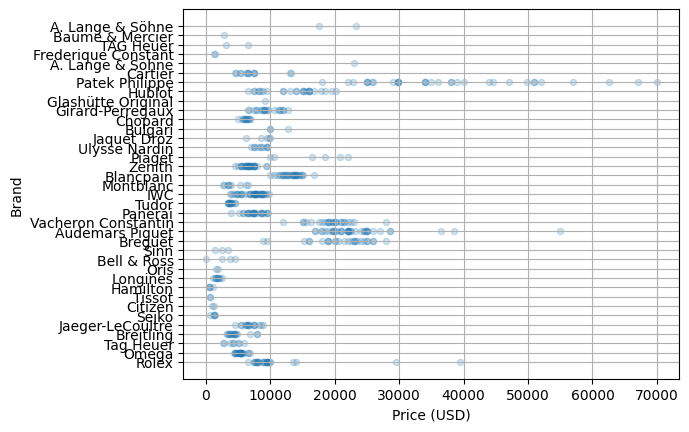

In [ ]:
watches_option.plot(kind="scatter", x="Price (USD)", y="Brand", grid=True, alpha=0.2)
plt.show()

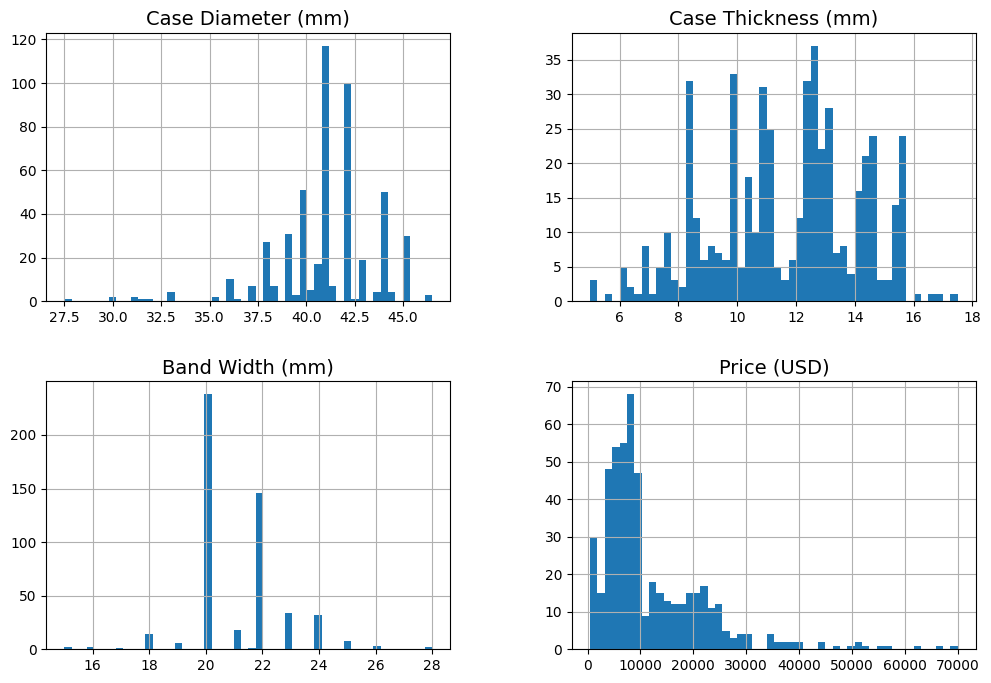

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

watches.hist(bins=50, figsize=(12, 8)) 
plt.show()

## Feature Selection and Pre-Processing

The Features we have decided are most important to take into consideration are Brand and Prices (USD). Branding is a huge consideration in pricing especially in the watch industry and so we believe this correlation is most important. These are Found in the 1st and 13th column.
1. Brand
2. Price (USD)

In [ ]:
brand = watches_option.iloc[:, 0].value_counts()
brand_min = brand[brand > 5]
print(brand_min)

Brand
IWC                    39
Audemars Piguet        38
Patek Philippe         33
Zenith                 30
Blancpain              29
Rolex                  27
Hublot                 26
Breguet                26
Vacheron Constantin    25
Panerai                25
Omega                  23
Girard-Perregaux       20
Breitling              16
Jaeger-LeCoultre       16
Tudor                  14
Cartier                13
Chopard                12
Ulysse Nardin          10
Montblanc               9
Longines                9
Tag Heuer               8
Piaget                  6
Name: count, dtype: int64


In [ ]:
price = watches_option.iloc[:, 13].value_counts()
print(price)

Price (USD)
7500.0     26
6500.0     22
9500.0     16
5500.0     11
4500.0     11
           ..
9900.0      1
7650.0      1
67000.0     1
27900.0     1
35000.0     1
Name: count, Length: 180, dtype: int64


## Selecting and training model

 In order to train the model, we have to get rid of the null values, that way the model can train properly. 

In [ ]:
df = df.dropna(subset=["Price (USD)"])
df["Power Reserve"] = df["Power Reserve"].fillna("Unknown")
df["Complications"] = df["Complications"].fillna("None")

To keep the price precise, we classify the watches in terms of the price with a simple function. It will also allow us to train classification models.

In [ ]:
def price_category(price):
    if price < 4000:
        return 0
    elif price <= 7000:
        return 1
    return 2

df["PriceCategory"] = df["Price (USD)"].apply(price_category)

These variables are used to train the models, where x contains all the watches' characteristics, such as the price, and y is the variable used for predicting the price and the category.

In [ ]:
X = df.drop(["Price (USD)", "PriceCategory"], axis=1)
X = pd.get_dummies(X, drop_first=True)

y_reg = df["Price (USD)"]       
y_clf = df["PriceCategory"]     

In [ ]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)


We use random forest to predict the watches' price. This model builds decision trees on random substes of the data.

Validation RMSE: 4609.019217844254


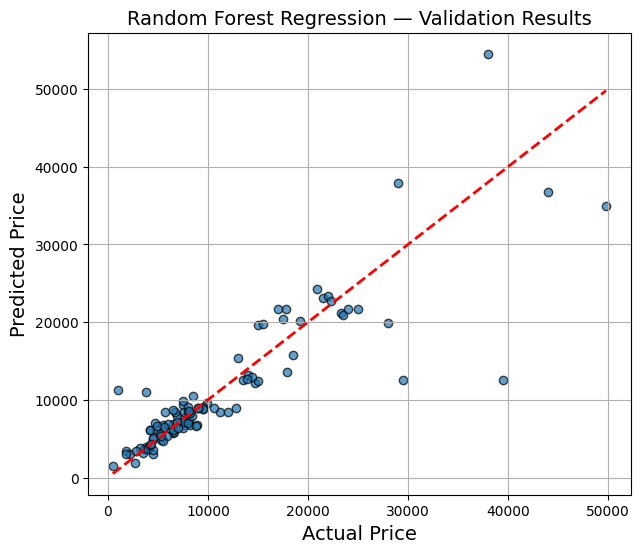

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Train model
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = rf_reg.predict(X_test_reg)

# Validation metric (RMSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = math.sqrt(mse)

print("Validation RMSE:", rmse)

# Plot: Actual vs Predicted
plt.figure(figsize=(7,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, edgecolors='k')
plt.plot([min(y_test_reg), max(y_test_reg)],
         [min(y_test_reg), max(y_test_reg)],
         'r--', linewidth=2)

plt.title("Random Forest Regression — Validation Results")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()



The Logistic Regression is a linear model for binary classification that estimates probabilities. Outputs probabilities and let us know how it classifies each category.

c:\Users\david\OneDrive - Technological University Dublin\year2\Y2AI\proyecto_test\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.7941176470588235
Test Accuracy: 0.7941176470588235


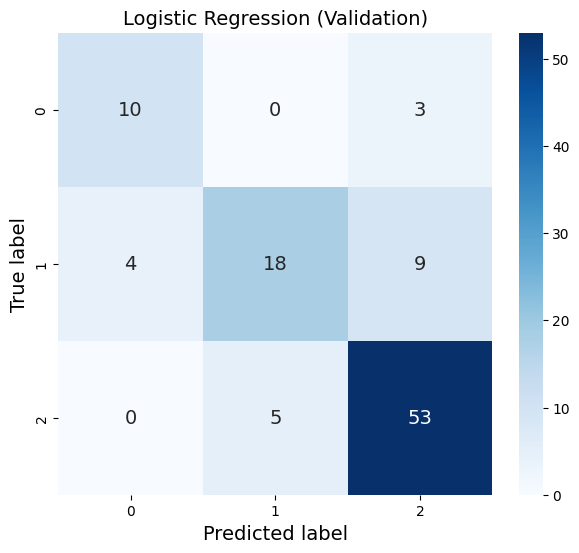

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf, y_train_clf)

y_val_pred = log_reg.predict(X_test_clf)
y_test_pred = y_val_pred   # same, because you have no validation split

val_acc = accuracy_score(y_test_clf, y_val_pred)
test_acc = val_acc

print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

cm = confusion_matrix(y_test_clf, y_val_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression (Validation)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


## Demo application

The user will be asked to input the Brand, Model and Color of the desired watch. With that data it will output an estimated price and category.

In [ ]:
def ml_demo_simple():
    print("--| Simple ML Demo App |--\n")

    brand_input = input("Enter the brand (e.g., Rolex, Omega): ")
    model_input = input("Enter the model (e.g., Submariner, Speedmaster): ")
    dial_color_input = input("Enter dial color (e.g., Black, Blue, Silver): ")

    new_watch = {
        "Brand": brand_input,
        "Model": model_input,
        "Case Material": "Steel",
        "Strap Material": "Steel",
        "Movement Type": "Automatic",
        "Water Resistance": "100m",
        "Case Diameter (mm)": 40,
        "Case Thickness (mm)": 12,
        "Band Width (mm)": 20,
        "Dial Color": dial_color_input,
        "Crystal Material": "Sapphire",
        "Complications": "None",
        "Power Reserve": "Unknown"
    }

    new_df = pd.DataFrame([new_watch])

    
    new_df = pd.get_dummies(new_df)


    for col in X.columns:
        if col not in new_df.columns:
            new_df[col] = 0

    new_df = new_df[X.columns]

    predicted_price = rf_reg.predict(new_df)[0]
    predicted_cat = log_reg.predict(new_df)[0]

    category_names = {
        0: "Low Price (< $4000)",
        1: "Medium Price ($4000–$7000)",
        2: "High Price (> $7000)"
    }

    print(f"Estimated Price: ${predicted_price:,.2f}")
    print(f"Estimated Category: {predicted_cat} → {category_names[predicted_cat]}")

   


In [ ]:
ml_demo_simple()



--| Simple ML Demo App |--

Estimated Price: $12,369.01
Estimated Category: 2 → High Price (> $7000)


C:\Users\david\AppData\Local\Temp\ipykernel_16936\1485280959.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col] = 0
C:\Users\david\AppData\Local\Temp\ipykernel_16936\1485280959.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col] = 0
C:\Users\david\AppData\Local\Temp\ipykernel_16936\1485280959.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1